# Acceleration Data Exploration

In [22]:
import numpy as np
import dataloader_halogaland.dataloader as dl
import matplotlib.pyplot as plt
import os
import scipy

In [5]:

loader = dl.Dataloader(os.getcwd()+'/../Data/Halogaland_2022_04_22')
file = loader.read_file(loader.anodes[0])

acc = loader.load_acceleration(loader.acc_names[0], file)

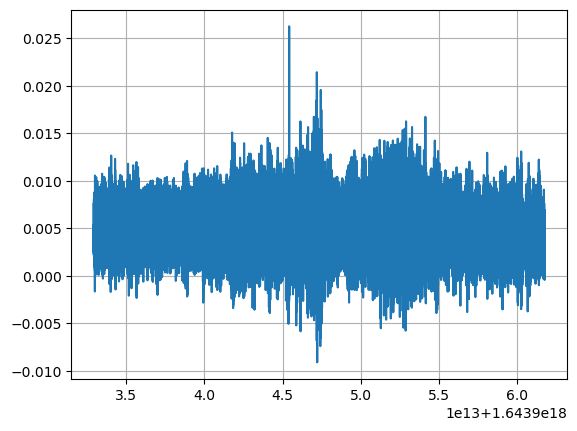

In [11]:
plt.plot(acc['timestamp'], acc['1y'])
plt.grid()
plt.show()

### Fourier transform to investigate the frequncy content

1843200


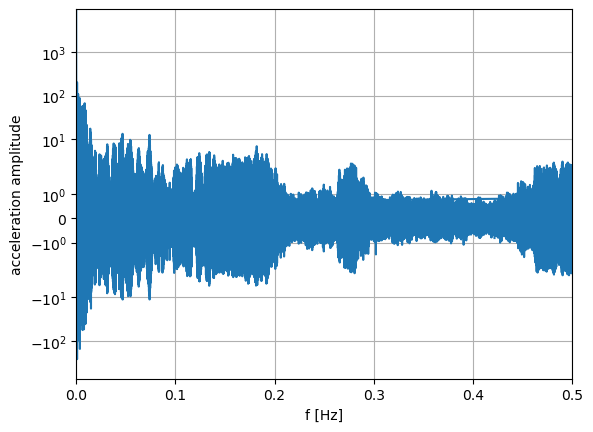

In [60]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

acc_fft = np.fft.fft(acc['1y'])
freq = np.fft.fftfreq(acc['timestamp'].shape[-1])
print(len(freq))
plt.plot(freq, acc_fft.real)
plt.xlabel("f [Hz]")
plt.ylabel("acceleration amplitude")
plt.xlim([0, 0.5])
plt.yscale('symlog')
plt.grid()
plt.show()

### Acceleration spectrum from Welch's method

16385


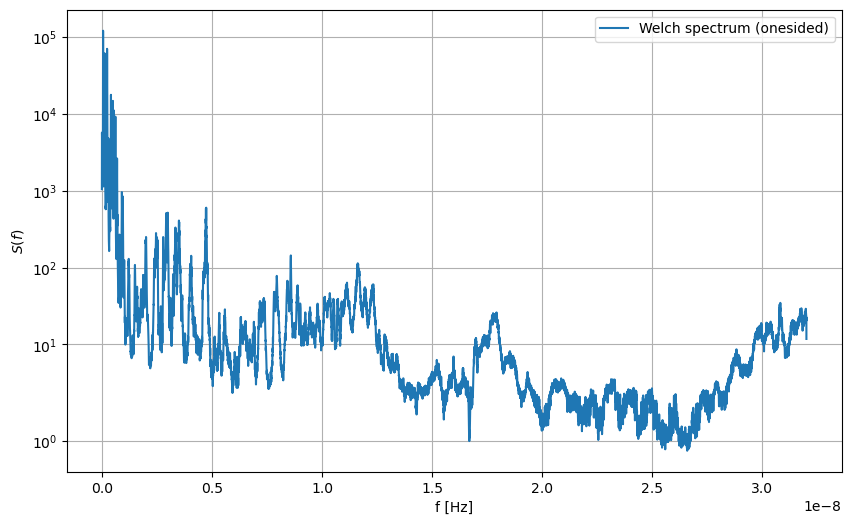

In [64]:
Ndivisions=100 # Number of divisions of the time series (total segments)
Nwindow=np.ceil(len(acc['timestamp'])/Ndivisions) # Length of window/segment

Nfft_pow2 = 2**(np.ceil(np.log2(Nwindow))) # Next power of 2 for zero padding
dt=acc['timestamp'][1]-acc['timestamp'][0] # Time step

# Call welch from scipy signal processing
f, Sx_welch_temp=scipy.signal.welch(acc['1y'], fs=1/dt, window='hann', nperseg=Nwindow, noverlap=None, nfft=Nfft_pow2, detrend='constant', return_onesided=True, scaling='density', axis=- 1, average='mean')


print(len(f))
# Plot and compare with exact solution
plt.figure(figsize=(10,6))
#plt.plot(w,Sx,'-' ,label = 'Exact spectrum (onesided)')
plt.plot(f,Sx_welch_temp ,label = 'Welch spectrum (onesided)')
plt.xlabel('f [Hz]')
plt.ylabel('$S(f)$')
plt.yscale('symlog')
plt.grid()
plt.legend()